# Topic Model For Titles

## Prepare data for LDA Analysis

In [1]:
import pandas as pd
import gensim
from gensim import corpora, models
from gensim.utils import simple_preprocess
import nltk
from nltk.corpus import stopwords
from pprint import pprint
# nltk.download('stopwords')

C:\Users\Haghbin\AppData\Local\Programs\Python\Python38\lib\site-packages\gensim\similarities\__init__.py:15: UserWarning: The gensim.similarities.levenshtein submodule is disabled, because the optional Levenshtein package <https://pypi.org/project/python-Levenshtein/> is unavailable. Install Levenhstein (e.g. `pip install python-Levenshtein`) to suppress this warning.
  warnings.warn(msg)


In [2]:
papers = pd.read_csv('./Dataset_00_02_10_cleaned.csv')

In [4]:
papers.head(5)

,Title,Year,Cited by,Affiliations,Abstract,Author Keywords,Index Keywords,paper_Title_processed,paper_Abstract_processed
0,Connectionism and cognitive architecture: A cr...,1988,1606.0,"CUNY Graduate Center, United States; Universit...",This paper explores differences between Connec...,NaN,article; brain; cognition; human; linguistics;...,connectionism and cognitive architecture a cri...,this paper explores differences between connec...
1,Implicit Learning and Tacit Knowledge,1989,1213.0,"Brooklyn College, the Graduate Center, City Un...","I examine the phenomenon of implicit learning,...",NaN,NaN,implicit learning and tacit knowledge,i examine the phenomenon of implicit learning ...
2,Stable Adaptive Teleoperation,1991,1091.0,"Nonlinear Systems Laboratory, Massachusetts In...","Telerobotics, the body of science and technolo...",NaN,"Control Systems, Cascade; Control Systems, Del...",stable adaptive teleoperation,telerobotics the body of science and technolog...
3,Hippocampal synaptic enhancement and informati...,1987,885.0,"Department of Psychology, University of Colora...",The hypothesis that the physical substrate of ...,NaN,animal experiment; central nervous system; ele...,hippocampal synaptic enhancement and informati...,the hypothesis that the physical substrate of ...
4,Catastrophic Interference in Connectionist Net...,1989,803.0,NaN,Connectionist networks in which information is...,NaN,NaN,catastrophic interference in connectionist net...,connectionist networks in which information is...


## TF Model

In [3]:
stop_words = stopwords.words('english')
stop_words.extend(['from', 'subject', 're', 'edu', 'use'])
def sent_to_words(sentences):
    for sentence in sentences:
        # deacc=True removes punctuations
        yield(gensim.utils.simple_preprocess(str(sentence), deacc=True))
def remove_stopwords(texts):
    return [[word for word in simple_preprocess(str(doc)) 
             if word not in stop_words] for doc in texts]
data = papers.paper_Title_processed.values.tolist()
data_words = list(sent_to_words(data))
# remove stop words
data_words = remove_stopwords(data_words)
print(data_words[0:3])

[['connectionism', 'cognitive', 'architecture', 'critical', 'analysis'], ['implicit', 'learning', 'tacit', 'knowledge'], ['stable', 'adaptive', 'teleoperation']]


In [4]:
import gensim.corpora as corpora
# Create Dictionary
id2word_title = corpora.Dictionary(data_words)
# Create Corpus
texts = data_words
# Term Document Frequency
bow_corpus_title = [id2word_title.doc2bow(text) for text in texts]
# View
print(bow_corpus_title[:2])

[[(0, 1), (1, 1), (2, 1), (3, 1), (4, 1)], [(5, 1), (6, 1), (7, 1), (8, 1)]]


## TF-IDF Model

In [5]:
tfidf_title = gensim.models.TfidfModel(bow_corpus_title)
corpus_tfidf_title = tfidf_title[bow_corpus_title]

for doc in corpus_tfidf_title:
    pprint(doc)
    break

[(0, 0.3712402375680893),
 (1, 0.48730678479343864),
 (2, 0.13887937534795927),
 (3, 0.5987029024388394),
 (4, 0.49697096214863506)]


# Running LDA using Bag of Words

In [6]:

# number of topics
num_topics = 10
# Build LDA model
lda_model_title_bow = gensim.models.LdaMulticore(corpus=bow_corpus_title,id2word=id2word_title,
                                             num_topics=num_topics,passes=2, workers=2)

# Print the Keyword in the 10 topics
pprint(lda_model_title_bow.print_topics())
doc_lda_title_bow = lda_model_title_bow[bow_corpus_title]

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.



Traceback (most recent call last):
  File "C:\Users\Haghbin\AppData\Local\Programs\Python\Python38\lib\site-packages\gensim\models\ldamulticore.py", line 292, in update
    job_queue.put((chunk_no, chunk, self.state), block=False)
  File "C:\Users\Haghbin\AppData\Local\Programs\Python\Python38\lib\multiprocessing\queues.py", line 84, in put
    raise Full
queue.Full

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "C:\Users\Haghbin\AppData\Roaming\Python\Python38\site-packages\IPython\core\interactiveshell.py", line 3418, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-6-067c468533b2>", line 4, in <module>
    lda_model_title_bow = gensim.models.LdaMulticore(corpus=bow_corpus_title,id2word=id2word_title,
  File "C:\Users\Haghbin\AppData\Local\Programs\Python\Python38\lib\site-packages\gensim\models\ldamulticore.py", line 179, in __init__
    super(LdaMulticore, self).__init__(
  File

TypeError: object of type 'NoneType' has no len()

In [ ]:
coherence=gensim.models.CoherenceModel(model=lda_model_title_bow, dictionary=id2word_title,texts = data_words,coherence='c_v')
coherence.get_coherence()

In [18]:
# number of topics
num_topics = 10
# Build LDA model
lda_model_title_bow2 = gensim.models.ldamodel.LdaModel(corpus=bow_corpus_title,id2word=id2word_title,
                                             num_topics=num_topics,
                                           random_state=100,
                                           update_every=1,
                                           chunksize=100,
                                           passes=10,
                                           alpha='auto',
                                           per_word_topics=True)


# Print the Keyword in the 10 topics
pprint(lda_model_title_bow2.print_topics())
doc_lda_title_bow2 = lda_model_title_bow[bow_corpus_title2]

C:\Users\Haghbin\AppData\Roaming\Python\Python38\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


[(0,
  '0.366*"mind" + 0.118*"models" + 0.094*"system" + 0.064*"scientific" + '
  '0.047*"evolutionary" + 0.037*"concept" + 0.036*"implications" + '
  '0.035*"agency" + 0.027*"empirical" + 0.022*"learn"'),
 (1,
  '0.609*"cognitive" + 0.320*"science" + 0.015*"classification" + '
  '0.005*"diagnosis" + 0.004*"errors" + 0.002*"diagnostic" + 0.000*"religion" '
  '+ 0.000*"embodied" + 0.000*"model" + 0.000*"de"'),
 (2,
  '0.223*"new" + 0.221*"knowledge" + 0.091*"perspectives" + 0.080*"clinical" + '
  '0.068*"processes" + 0.032*"expertise" + 0.024*"uncertainty" + '
  '0.019*"implicit" + 0.013*"unconscious" + 0.013*"decisions"'),
 (3,
  '0.244*"theory" + 0.159*"design" + 0.159*"intelligence" + 0.101*"experience" '
  '+ 0.091*"role" + 0.030*"tool" + 0.024*"comparative" + 0.017*"software" + '
  '0.016*"domain" + 0.016*"fuzzy"'),
 (4,
  '0.187*"representation" + 0.178*"towards" + 0.163*"memory" + '
  '0.074*"evaluation" + 0.070*"toward" + 0.033*"cross" + 0.031*"developmental" '
  '+ 0.021*"reply

NameError: name 'bow_corpus_title2' is not defined

In [19]:
coherence=gensim.models.CoherenceModel(model=lda_model_title_bow, dictionary=id2word_title,texts = data_words,coherence='c_v')
coherence.get_coherence()

C:\Users\Haghbin\AppData\Roaming\Python\Python38\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


0.43897696532307995

In [31]:
import matplotlib.pyplot as plt
def compute_coherence_values(dictionary, corpus, texts, limit, start=2, step=3):
    coherence_values = []
    model_list = []
    for num_topics in range(start, limit, step):
        model = gensim.models.LdaMulticore(corpus=corpus,
                                           id2word=dictionary,
                                           num_topics=num_topics)
        model_list.append(model)
        coherencemodel = gensim.models.CoherenceModel(model=model, texts=texts, dictionary=dictionary, coherence='c_v')
        coherence_values.append(coherencemodel.get_coherence())

    return model_list, coherence_values


C:\Users\Haghbin\AppData\Roaming\Python\Python38\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


C:\Users\Haghbin\AppData\Roaming\Python\Python38\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


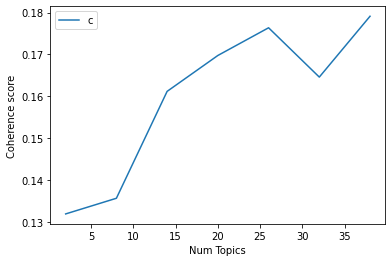

Num Topics = 2  has Coherence Value of 0.1319
Num Topics = 8  has Coherence Value of 0.1356
Num Topics = 14  has Coherence Value of 0.1612
Num Topics = 20  has Coherence Value of 0.1697
Num Topics = 26  has Coherence Value of 0.1764
Num Topics = 32  has Coherence Value of 0.1646
Num Topics = 38  has Coherence Value of 0.1791


In [38]:
limit=40; start=2; step=6;
model_list, coherence_values = compute_coherence_values(dictionary=id2word_title, corpus=bow_corpus_title,
                                                        texts=data_words,
                                                        start=start, limit=limit, step=step)

x = range(start, limit, step)
plt.plot(x, coherence_values)
plt.xlabel("Num Topics")
plt.ylabel("Coherence score")
plt.legend(("coherence_values"), loc='best')
plt.show()



for m, cv in zip(x, coherence_values):
    print("Num Topics =", m, " has Coherence Value of", round(cv, 4))
    


# Running LDA using TF-IDF

In [7]:
# number of topics
num_topics = 10
# Build LDA model
# lda_model_title_tfidf = gensim.models.LdaMulticore(corpus=corpus_tfidf_title,id2word=id2word_title,
#                                              num_topics=num_topics,passes=2, workers=4)

lda_model_title_tfidf = gensim.models.ldamodel.LdaModel(corpus=corpus_tfidf_title,
                                           id2word=id2word_title,
                                           num_topics=15,
                                           random_state=100,
                                           update_every=1,
                                           chunksize=100,
                                           passes=10,
                                           alpha='auto',
                                           per_word_topics=True)
# Print the Keyword in the 10 topics
pprint(lda_model_title_tfidf.print_topics())
doc_lda_title_tfidf = lda_model_title_tfidf[corpus_tfidf_title]

[(0,
  '0.120*"using" + 0.082*"representation" + 0.062*"visual" + '
  '0.049*"scientific" + 0.033*"classification" + 0.031*"concept" + '
  '0.030*"view" + 0.029*"communication" + 0.026*"dynamic" + 0.022*"search"'),
 (1,
  '0.109*"language" + 0.105*"model" + 0.070*"towards" + 0.064*"perception" + '
  '0.060*"development" + 0.060*"memory" + 0.031*"toward" + 0.029*"second" + '
  '0.022*"paradigm" + 0.006*"direct"'),
 (2,
  '0.058*"cognitive" + 0.046*"science" + 0.019*"religion" + 0.016*"study" + '
  '0.013*"self" + 0.013*"philosophy" + 0.012*"case" + 0.012*"computational" + '
  '0.011*"review" + 0.010*"neuroscience"'),
 (3,
  '0.121*"design" + 0.074*"experience" + 0.060*"understanding" + '
  '0.046*"behavior" + 0.044*"implications" + 0.038*"children" + '
  '0.017*"software" + 0.014*"phenomena" + 0.012*"rules" + '
  '0.010*"instructional"'),
 (4,
  '0.148*"learning" + 0.108*"sciences" + 0.096*"research" + 0.070*"social" + '
  '0.050*"reasoning" + 0.029*"foundations" + 0.028*"aspects" + '
 

In [10]:
coherence=gensim.models.CoherenceModel(model=lda_model_title_tfidf, dictionary=id2word_title,texts = data_words,coherence='c_v')
coherence.get_coherence()

C:\Users\Haghbin\AppData\Roaming\Python\Python38\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


0.5313608748121257

C:\Users\Haghbin\AppData\Roaming\Python\Python38\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


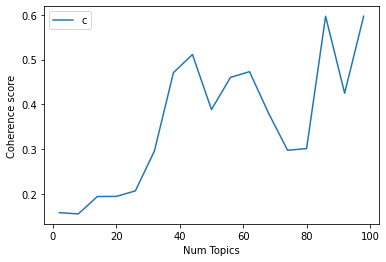

Num Topics = 2  has Coherence Value of 0.1577
Num Topics = 8  has Coherence Value of 0.1549
Num Topics = 14  has Coherence Value of 0.1938
Num Topics = 20  has Coherence Value of 0.194
Num Topics = 26  has Coherence Value of 0.2064
Num Topics = 32  has Coherence Value of 0.2955
Num Topics = 38  has Coherence Value of 0.4705
Num Topics = 44  has Coherence Value of 0.5112
Num Topics = 50  has Coherence Value of 0.3881
Num Topics = 56  has Coherence Value of 0.46
Num Topics = 62  has Coherence Value of 0.4728
Num Topics = 68  has Coherence Value of 0.3801
Num Topics = 74  has Coherence Value of 0.2972
Num Topics = 80  has Coherence Value of 0.3009
Num Topics = 86  has Coherence Value of 0.5967
Num Topics = 92  has Coherence Value of 0.4247
Num Topics = 98  has Coherence Value of 0.5967


In [36]:
limit=100; start=2; step=6;
model_list, coherence_values = compute_coherence_values(dictionary=id2word_title, corpus=corpus_tfidf_title,
                                                        texts=data_words,
                                                        start=start, limit=limit, step=step)

x = range(start, limit, step)
plt.plot(x, coherence_values)
plt.xlabel("Num Topics")
plt.ylabel("Coherence score")
plt.legend(("coherence_values"), loc='best')
plt.show()



for m, cv in zip(x, coherence_values):
    print("Num Topics =", m, " has Coherence Value of", round(cv, 4))
    

# Analyzing LDA model results

### 1. Bag of Words Model

In [8]:
import pyLDAvis
import pyLDAvis.gensim_models as gensimvis
pyLDAvis.enable_notebook()

# feed the LDA model into the pyLDAvis instance
lda_viz_title_bow = gensimvis.prepare(lda_model_title_bow, bow_corpus_title, id2word_title)
pyLDAvis.save_html(lda_viz_title_bow, './web/bow_title_'+ str(num_topics) +'.html')
lda_viz_title_bow

NameError: name 'lda_model_title_bow' is not defined

### 2. TF-IDF Model

In [9]:
lda_viz_title_tfidf = gensimvis.prepare(lda_model_title_tfidf, corpus_tfidf_title, id2word_title)
pyLDAvis.save_html(lda_viz_title_tfidf, './web/tfidf_title_'+ str(num_topics) +'.html')
lda_viz_title_tfidf

C:\Users\Haghbin\AppData\Roaming\Python\Python38\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
2     -0.475519  0.056234       1        1  38.037464
10    -0.039039 -0.365694       2        1   9.805863
4      0.014273  0.018606       3        1   6.106972
8      0.035260  0.024010       4        1   5.065432
5      0.024797  0.022041       5        1   4.870534
7      0.036651  0.024199       6        1   4.705528
6      0.030074  0.023216       7        1   4.660379
11     0.036289  0.024153       8        1   4.451720
1      0.041593  0.024633       9        1   4.440923
0      0.041404  0.024690      10        1   3.785963
9      0.045974  0.024903      11        1   3.464906
14     0.043420  0.024813      12        1   3.154587
3      0.055038  0.024776      13        1   2.852767
12     0.051072  0.024951      14        1   2.727708
13     0.058713  0.024469      15        1   1.869254, topic_info=            Term         Freq        Total Category  logprob  loglift
116         mind   814.000000   814.000000  Default  30.0000  30.0000
7       learning   805.000000   805.000000  Default  29.0000  29.0000
35     cognition   838.000000   838.000000  Default  28.0000  28.0000
45         based   611.000000   611.000000  Default  27.0000  27.0000
2      cognitive  1952.000000  1952.000000  Default  26.0000  26.0000
...          ...          ...          ...      ...      ...      ...
3151   political     0.072133     1.712788  Topic15 -10.0441   0.8123
1429          th     0.072348     1.731767  Topic15 -10.0412   0.8042
2827   epistemic     0.072241     1.723832  Topic15 -10.0426   0.8073
7298  enactivism     0.072442     1.754352  Topic15 -10.0399   0.7926
4489    tracking     0.072349     1.740415  Topic15 -10.0412   0.7992

[880 rows x 6 columns], token_table=      Topic      Freq         Term
term                              
220      11  0.990557  acquisition
91        8  0.993623       action
208      14  0.973430       active
9        11  0.977850     adaptive
259      14  0.983261       agency
...     ...       ...          ...
196      10  0.982683         view
418      10  0.992167       visual
3208      2  0.989036       volume
20        5  0.982719       within
291       2  0.988406         word

[280 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[3, 11, 5, 9, 6, 8, 7, 12, 2, 1, 10, 15, 4, 13, 14])

In [39]:
def compute_coherence_values(dictionary, corpus, texts, limit, start=2, step=3):
    coherence_values = []
    model_list = []
    for num_topics in range(start, limit, step):
        model = gensim.models.ldamodel.LdaModel(corpus=corpus,
                                           id2word=dictionary,
                                           num_topics=num_topics,
                                             random_state=100,
                                           update_every=1,
                                           chunksize=100,
                                           passes=10,
                                           alpha='auto',
                                           per_word_topics=True)
        model_list.append(model)
        coherencemodel = gensim.models.CoherenceModel(model=model, texts=texts, dictionary=dictionary, coherence='c_v')
        coherence_values.append(coherencemodel.get_coherence())

    return model_list, coherence_values



C:\Users\Haghbin\AppData\Roaming\Python\Python38\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


C:\Users\Haghbin\AppData\Roaming\Python\Python38\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


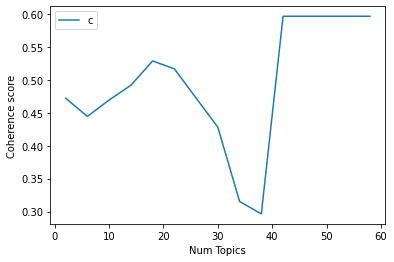

Num Topics = 2  has Coherence Value of 0.4722
Num Topics = 6  has Coherence Value of 0.4445
Num Topics = 10  has Coherence Value of 0.4695
Num Topics = 14  has Coherence Value of 0.4919
Num Topics = 18  has Coherence Value of 0.5288
Num Topics = 22  has Coherence Value of 0.5168
Num Topics = 26  has Coherence Value of 0.4724
Num Topics = 30  has Coherence Value of 0.4281
Num Topics = 34  has Coherence Value of 0.3153
Num Topics = 38  has Coherence Value of 0.2964
Num Topics = 42  has Coherence Value of 0.5967
Num Topics = 46  has Coherence Value of 0.5967
Num Topics = 50  has Coherence Value of 0.5967
Num Topics = 54  has Coherence Value of 0.5967
Num Topics = 58  has Coherence Value of 0.5967


In [43]:
limit=60; start=2; step=4;
model_list, coherence_values = compute_coherence_values(dictionary=id2word_title, corpus=corpus_tfidf_title,
                                                        texts=data_words,
                                                        start=start, limit=limit, step=step)

x = range(start, limit, step)
plt.plot(x, coherence_values)
plt.xlabel("Num Topics")
plt.ylabel("Coherence score")
plt.legend(("coherence_values"), loc='best')
plt.show()



for m, cv in zip(x, coherence_values):
    print("Num Topics =", m, " has Coherence Value of", round(cv, 4))
    

C:\Users\Haghbin\AppData\Roaming\Python\Python38\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


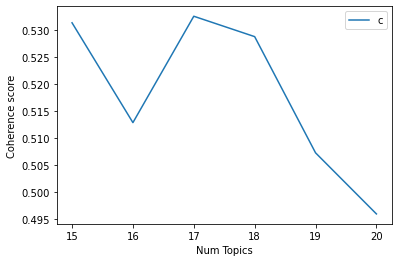

Num Topics = 15  has Coherence Value of 0.5314
Num Topics = 16  has Coherence Value of 0.5128
Num Topics = 17  has Coherence Value of 0.5326
Num Topics = 18  has Coherence Value of 0.5288
Num Topics = 19  has Coherence Value of 0.5072
Num Topics = 20  has Coherence Value of 0.4959


In [44]:
limit=21; start=15; step=1;
model_list, coherence_values = compute_coherence_values(dictionary=id2word_title, corpus=corpus_tfidf_title,
                                                        texts=data_words,
                                                        start=start, limit=limit, step=step)

x = range(start, limit, step)
plt.plot(x, coherence_values)
plt.xlabel("Num Topics")
plt.ylabel("Coherence score")
plt.legend(("coherence_values"), loc='best')
plt.show()



for m, cv in zip(x, coherence_values):
    print("Num Topics =", m, " has Coherence Value of", round(cv, 4))